# DATASUS stats

## Prepare data

In [0]:
import pandas as pd
pd.set_option('display.max_info_columns', 500)

In [0]:
sinasc = pd.read_csv('http://bit.ly/df_sinasc_es_2017')
sinasc['MORTALIDADE'] = 0

In [0]:
sim = pd.read_csv('http://bit.ly/df_sim_es_2017')
sim['MORTALIDADE'] = 1

In [0]:
dndo = pd.merge(sinasc, sim, how='left', on='NUMERODN')

In [5]:
dndo.columns

Index(['Unnamed: 0_x', 'NUMERODN', 'CODINST_x', 'ORIGEM_x', 'NUMERODV_x',
       'PREFIXODN', 'CODESTAB_x', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE_x',
       ...
       'FONTES', 'TPRESGINFO', 'TPNIVELINV', 'NUDIASINF', 'DTCADINF',
       'MORTEPARTO', 'DTCONCASO', 'FONTESINF', 'ALTCAUSA', 'MORTALIDADE_y'],
      dtype='object', length=159)

In [6]:
(dndo.MORTALIDADE_x == 0).sum()

55846

In [7]:
(dndo.MORTALIDADE_y == 1).sum()

342

In [0]:
dndo['MORTALIDADE'] = -1
dndo.loc[dndo['MORTALIDADE_x'] == 0, 'MORTALIDADE'] = 0
dndo.loc[dndo['MORTALIDADE_y'] == 1, 'MORTALIDADE'] = 1
mortalidades = ['MORTALIDADE_x', 'MORTALIDADE_y']
dndo = dndo.drop(mortalidades, 1)

In [9]:
dndo.MORTALIDADE.value_counts()

0    55504
1      342
Name: MORTALIDADE, dtype: int64

In [0]:
do = dndo[dndo['MORTALIDADE'] == 1]
dn = dndo[dndo['MORTALIDADE'] == 0]

## EDA -- exploratory data analysis

In [11]:
dndo.columns

Index(['Unnamed: 0_x', 'NUMERODN', 'CODINST_x', 'ORIGEM_x', 'NUMERODV_x',
       'PREFIXODN', 'CODESTAB_x', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE_x',
       ...
       'FONTES', 'TPRESGINFO', 'TPNIVELINV', 'NUDIASINF', 'DTCADINF',
       'MORTEPARTO', 'DTCONCASO', 'FONTESINF', 'ALTCAUSA', 'MORTALIDADE'],
      dtype='object', length=158)

In [0]:
data = dndo[['LOCNASC',
 'IDADEMAE_x',
 'ESTCIVMAE',
 'ESCMAE_x',
 'CODOCUPMAE',
 'QTDFILVIVO_x',
 'QTDFILMORT_x',
 'CODMUNRES_x',
 'GESTACAO_x',
 'GRAVIDEZ_x',
 'PARTO_x',
 'CONSULTAS',
 'DTNASC_x',
 'HORANASC',
 'SEXO_x',
 'APGAR1',
 'APGAR5',
 'RACACOR_x',
 'PESO_x',
 'IDANOMAL',
 'RACACORMAE',
 'QTDGESTANT',
 'QTDPARTNOR',
 'QTDPARTCES',
 'IDADEPAI',
 'SEMAGESTAC_x',
 'TPMETESTIM',
 'CONSPRENAT',
 'MESPRENAT',
 'TPAPRESENT',
 'STTRABPART',
 'STCESPARTO',
 'STDNEPIDEM',
 'TPROBSON',
 'PARIDADE',
 'KOTELCHUCK',
 'MORTALIDADE'
 ]]

### APGAR1

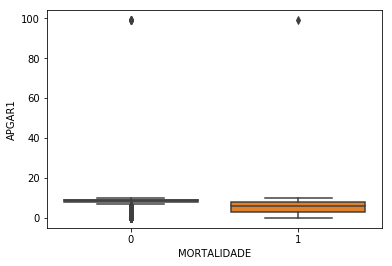

In [13]:
import seaborn as sns
sns.boxplot(x='MORTALIDADE', y='APGAR1', data=data)

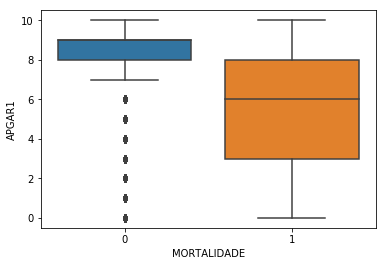

In [14]:
data = data[data['APGAR1'] < 99]
sns.boxplot(x='MORTALIDADE', y='APGAR1', data=data)

### APGAR5

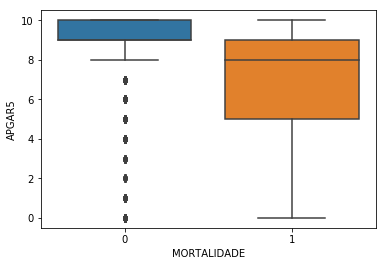

In [15]:
data = data[data['APGAR5'] < 99]
sns.boxplot(x='MORTALIDADE', y='APGAR5', data=data)

### PESO

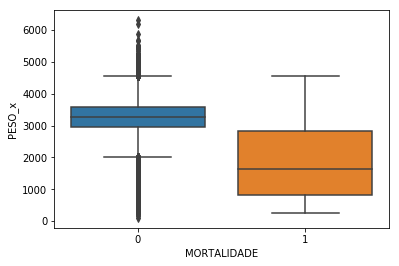

In [16]:
sns.boxplot(x='MORTALIDADE', y='PESO_x', data=data)

### CONSULTAS

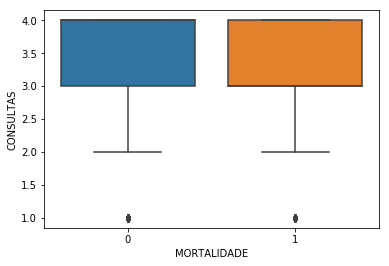

In [17]:
data = data[data['CONSULTAS'] < 9]
sns.boxplot(x='MORTALIDADE', y='CONSULTAS', data=data)

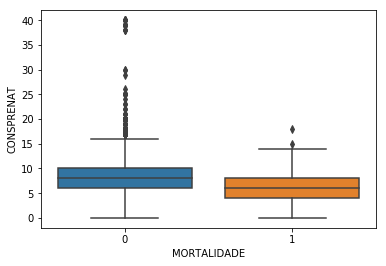

In [18]:
sns.boxplot(x='MORTALIDADE', y='CONSPRENAT', data=data)

### IDADE

#### MAE

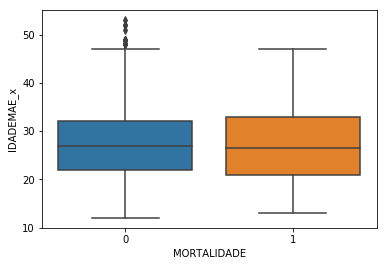

In [19]:
sns.boxplot(x='MORTALIDADE', y='IDADEMAE_x', data=data)

#### PAI

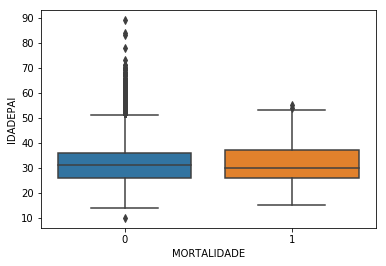

In [28]:
sns.boxplot(x='MORTALIDADE', y='IDADEPAI', data=data)

### GESTACAO

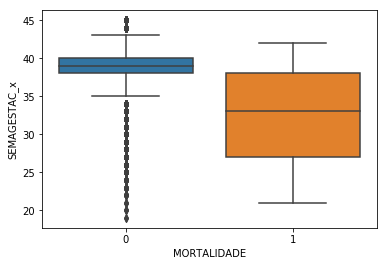

In [21]:
sns.boxplot(x='MORTALIDADE', y='SEMAGESTAC_x', data=data)

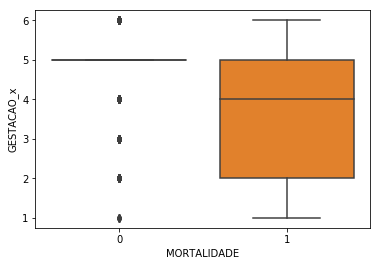

### FILHOS

#### MORTOS

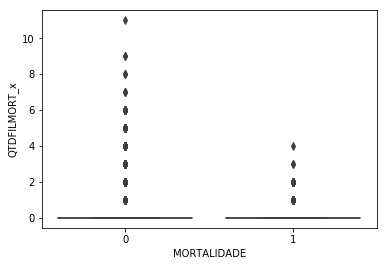

In [23]:
sns.boxplot(x='MORTALIDADE', y='QTDFILMORT_x', data=data)

#### VIVOS

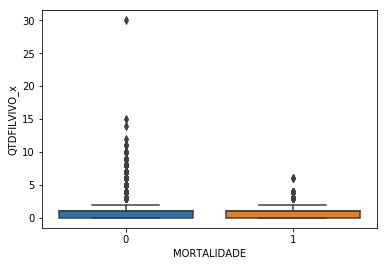

In [24]:
sns.boxplot(x='MORTALIDADE', y='QTDFILVIVO_x', data=data)

### PARTOS

#### ANTERIORES

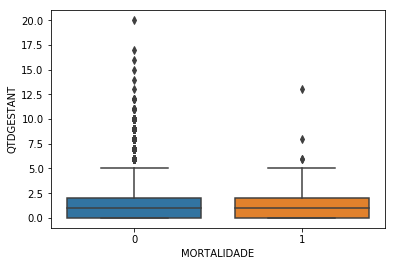

In [27]:
sns.boxplot(x='MORTALIDADE', y='QTDGESTANT', data=data)

#### NORMAIS

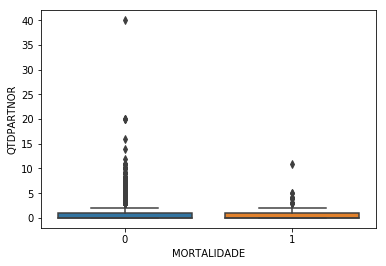

In [25]:
sns.boxplot(x='MORTALIDADE', y='QTDPARTNOR', data=data)

#### CESÁRIAS

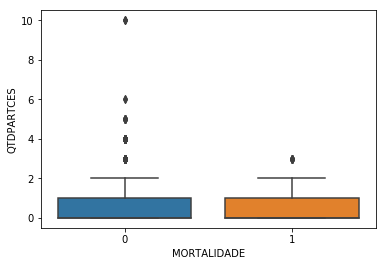

In [26]:
sns.boxplot(x='MORTALIDADE', y='QTDPARTCES', data=data)

### GRAVIDEZ
- 1– Única; 
- 2– Dupla; 
- 3– Tripla ou mais; 
- 9– Ignorado.

In [0]:
data.loc[data['GRAVIDEZ_x'] == 1, 'GRAVIDEZ_x'] = 'Unica'
data.loc[data['GRAVIDEZ_x'] == 2, 'GRAVIDEZ_x'] = 'Dupla'
data.loc[data['GRAVIDEZ_x'] == 3, 'GRAVIDEZ_x'] = 'Tripla ou mais'
data.loc[data['GRAVIDEZ_x'] == 9, 'GRAVIDEZ_x'] = 'Ignorado'

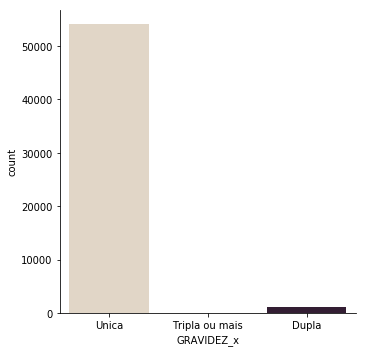

In [49]:
sns.catplot(x="GRAVIDEZ_x", kind="count", palette="ch:.25", data=data);

### LOCNASC
- 1 – Hospital; 
- 2 – Outros estabelecimentos de saúde; 
- 3 – Domicílio; 
- 4 – Outros.

In [0]:
data.loc[data['LOCNASC'] == 1, 'LOCNASC'] = 'Hospital'
data.loc[data['LOCNASC'] == 2, 'LOCNASC'] = 'Outros'
data.loc[data['LOCNASC'] == 3, 'LOCNASC'] = 'Domicilio'
data.loc[data['LOCNASC'] == 4, 'LOCNASC'] = 'Ignorado'

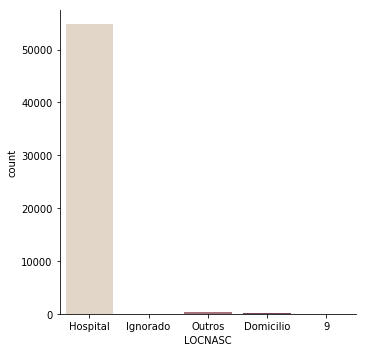

In [51]:
sns.catplot(x="LOCNASC", kind="count", palette="ch:.25", data=data);